In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/s(s+1)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#c) Dizajnirati integralni kompenzator koji obezbedjuje brzinsku konstantu > 10, i faznu marginu >45 stepeni
#d) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#e) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [3]:
W=signal.lti([], [0, -1], 1)

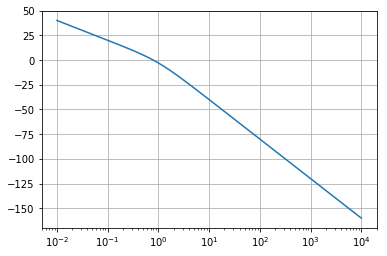

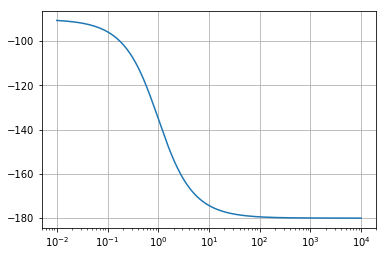

In [5]:
# a)
w_log=np.logspace(-2,4,num=10000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [6]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 0.79
Presecna ucestanost faze: 10000.0
Amplitudska margina: 100000000.5
Fazna margina: 51.86


In [7]:
#c) # Trazimo kontroler C(s)=K*alpha(s/z+1)/(s/p+1), p=z/alpha 
# I nacin : Trazimo pojacanje K za koje je fazna margina za oko 10 stepeni veca od trazene:
mag_PM=mag[phase[:]>=-180+55][-1]
K=1/(10**(mag_PM/20))
print("Pojacanje za koje je PM 55 je",round(K,1))

Pojacanje za koje je PM 55 je 0.9


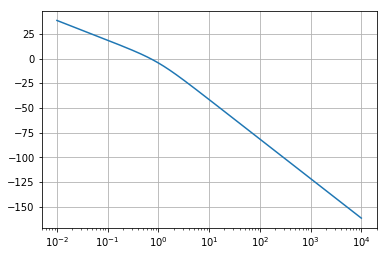

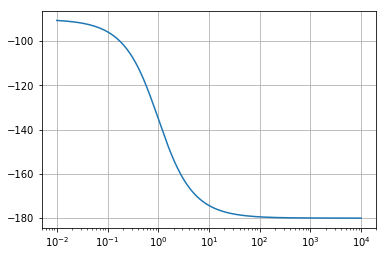

In [8]:
# Bodeov dijagram za KW(s):
W1=signal.lti([], [0, -1], K)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [10]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 0.7
Fazna margina: 55.0


In [14]:
# Da bismo dobili trazenu brzinsku konstantu 10, alpha treba da bude 10/K
alpha=10/K
# probamo nulu z npr. 5 puta manju od w1, znaci pol je p=z/alpha
z=w1/8
p=z/alpha
alpha,z,p

(11.70021667101463, 0.087517425081428013, 0.0074799832808428324)

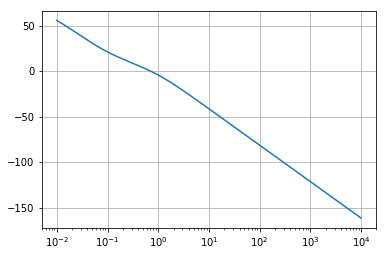

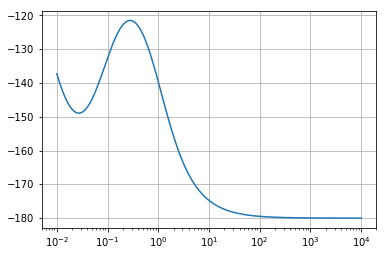

Presecna ucestanost pojacanja: 0.7
Fazna margina: 48.38


In [15]:
# Proveravamo sistem
W2=signal.lti([-z], [0, -1, -p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

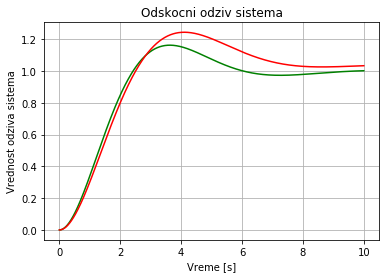

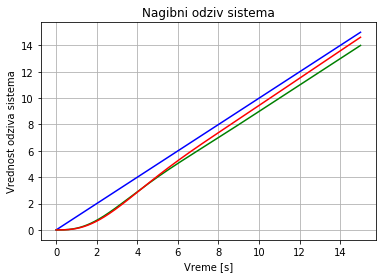

In [18]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=K(s+z)/s(s+1)(s+p)

brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,p])
imenilac=imenilac1+[0, 0, K, K*z]
G2=signal.lti(brojilac,imenilac)

G=signal.lti([1],[1, 1, 1])


t=np.linspace(0,10,1000)

tt,y1=G.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Odskocni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [19]:
# vidimo da smo sada dobili sporiji sistem od G2, jer smo konzervativnije postavili pol i nulu
# tako da je presecna ucestanost w1 jos manja (uz vecu faznu marginu)

In [20]:
#Zadatak 2:
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/(s/0.5+1)(s+1)(s/2+1) 
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#c) Dizajnirati integralni kompenzator koji obezbedjuje konstantu pojacanja K_p=9, i faznu marginu >40 stepeni
#d) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#e) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

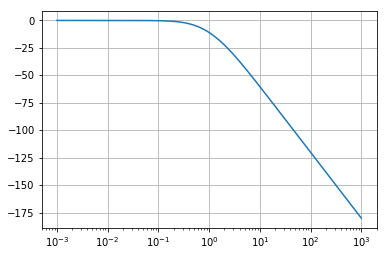

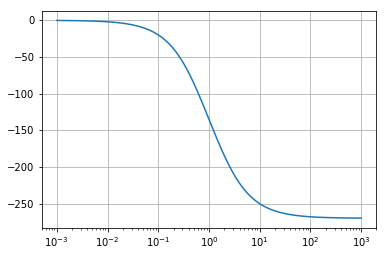

In [22]:
W=signal.lti([], [-0.5, -1,-2], 1)
# a)
w_log=np.logspace(-3,3,num=10000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [24]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

## GRESKA SE JAVLJA ZBOG TOGA STO KARAKTERISTIKA NIKADA NE DOSTIZE VREDNOST 1 (O U LOG DOMENU)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [25]:
#c) # Trazimo kontroler C(s)=K*alpha(s/z+1)/(s/p+1), p=z/alpha 
# I nacin : Trazimo pojacanje K za koje je fazna margina za oko 10 stepeni veca od trazene:
mag_PM=mag[phase[:]>=-180+50][-1]
K=1/(10**(mag_PM/20))
print("Pojacanje za koje je PM 55 je",round(K,1))

Pojacanje za koje je PM 55 je 3.2


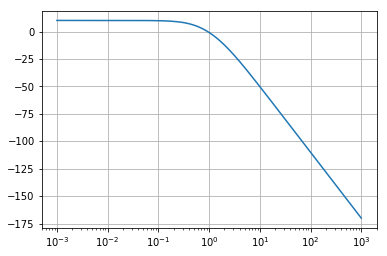

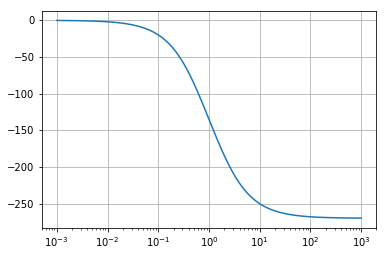

Presecna ucestanost pojacanja: 0.93
Presecna ucestanost faze: 1.87
Amplitudska margina: 3.51
Fazna margina: 50.09


In [32]:
# Bodeov dijagram za KW(s):
W1=signal.lti([], [-0.5, -1,-2], K)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [33]:
# Da bismo dobili trazenu brzinsku konstantu 10, alpha treba da bude 10/K
alpha=9/K
# probamo nulu z npr. 5 puta manju od w1, znaci pol je p=z/alpha
z=w1/5
p=z/alpha
alpha,z,p

(2.8130947642507205, 0.18677856109778768, 0.066396114155627073)

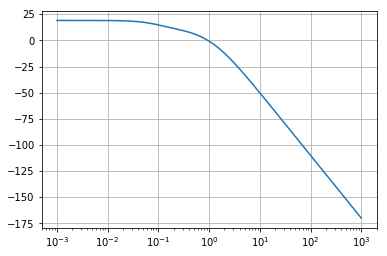

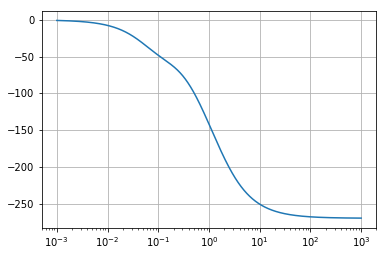

Presecna ucestanost pojacanja: 0.94
Fazna margina: 42.1


In [35]:
# Proveravamo sistem za C(s)=K*alpha*(s/z+1)/(s/p+1)=K(s+z)/(s+p)
W2=signal.lti([-z], [-0.5, -1, -2,-p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

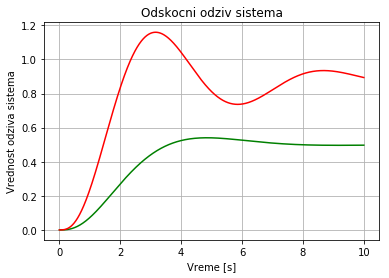

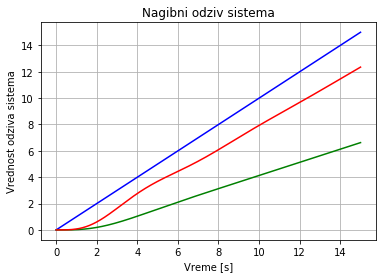

In [37]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=K(s+z)/s(s+1)(s+p)

brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0.5],[1,1]),[1,2]),[1,p])
imenilac=imenilac1+[0, 0, 0, K, K*z]
G2=signal.lti(brojilac,imenilac)

imenilac1=sp.convolve(sp.convolve([1,0.5],[1,1]),[1,2])
imenilac=imenilac1+[0, 0, 0, 1]
G=signal.lti([1],imenilac)


t=np.linspace(0,10,1000)

tt,y1=G.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Odskocni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()